# Depurando los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
covid_aragon = pd.read_csv('covid_aragon.csv')

In [23]:
covid_aragon

,Unnamed: 0,FECHA,AFECTADOS,MUERTOS,UCI,Altas,PCR,Req Hospital
0,0,5/3/20,1.0,0,1,0.0,1,NaN
1,1,6/3/20,6.0,1,1,0.0,6,NaN
2,2,9/3/20,13.0,1,1,0.0,13,NaN
3,3,10/3/20,38.0,3,3,0.0,38,NaN
4,4,11/3/20,45.0,4,3,0.0,45,NaN
...,...,...,...,...,...,...,...,...
320,320,21/1/21,NaN,2808,958,NaN,91191,10608.0
321,321,22/1/21,NaN,2824,960,NaN,91963,10692.0
322,322,23/1/21,NaN,2835,968,NaN,92643,10769.0
323,323,24/1/21,NaN,2847,977,NaN,93324,10847.0


In [24]:
covid_aragon["FECHA"] = pd.to_datetime(covid_aragon["FECHA"], dayfirst=True)

In [28]:
pcr_series = covid_aragon[["FECHA", "PCR"]]

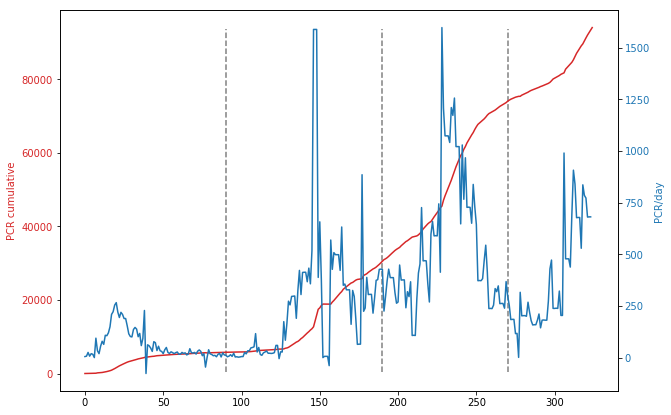

In [76]:
estimated_cuts = [0, 90, 190, 270, 325]

fig, ax1 = plt.subplots(figsize=(10,7))

for cut in estimated_cuts[1:-1]:
    ax1.axvline(cut, ymin=0.05, ymax=0.95, ls='--', c='grey')

color = 'tab:red'
ax1.plot(pcr_series["PCR"], color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel("PCR cumulative", color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(np.diff(pcr_series["PCR"]), color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("PCR/day", color=color)

plt.show()

In [77]:
olas = []
for i in range(len(estimated_cuts)-1):
    olas.append(pcr_series[estimated_cuts[i]:estimated_cuts[i+1]])

In [78]:
covid1 = olas[0]
covid2 = olas[1]

In [79]:
covid1[-1:]

,FECHA,PCR
89,2020-06-04,5757


In [80]:
covid2[0:1]

,FECHA,PCR
90,2020-06-05,5770


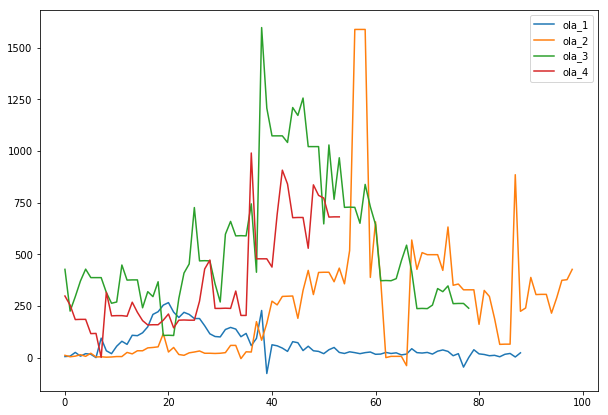

In [81]:
plt.figure(1, [10, 7])

for i in range(len(estimated_cuts)-1):
    plt.plot(np.diff(olas[i]["PCR"]), label="ola_%d"%(i+1))
plt.legend()
plt.show()  

In [84]:
for i in range(len(estimated_cuts)-1):
    olas[i].to_csv("covid_aragon_ola_%d" % (i + 1))